# Análisis y modificación del dataset

In [2]:
import numpy as np 
import pandas as pd 

import os

df_classes = pd.read_csv("/kaggle/input/wikiart/classes.csv")

In [3]:
df_classes

,filename,artist,genre,description,phash,width,height,genre_count,subset
0,Abstract_Expressionism/aaron-siskind_acolman-1...,aaron siskind,['Abstract Expressionism'],acolman-1-1955,bebbeb018a7d80a8,1922,1382,1,train
1,Abstract_Expressionism/aaron-siskind_chicago-6...,aaron siskind,['Abstract Expressionism'],chicago-6-1961,d7d0781be51fc00e,1382,1746,1,train
2,Abstract_Expressionism/aaron-siskind_glouceste...,aaron siskind,['Abstract Expressionism'],gloucester-16a-1944,9f846e5a6c639325,1382,1857,1,train
3,Abstract_Expressionism/aaron-siskind_jerome-ar...,aaron siskind,['Abstract Expressionism'],jerome-arizona-1949,a5d691f85ac5e4d0,1382,1849,1,train
4,Abstract_Expressionism/aaron-siskind_kentucky-...,aaron siskind,['Abstract Expressionism'],kentucky-4-1951,880df359e6b11db1,1382,1625,1,train
...,...,...,...,...,...,...,...,...,...
80037,Impressionism/edgar-degas_portrait-of-mary-cas...,edgar degas,['Impressionism'],portrait-of-mary-cassatt,fc8d8c9c49e15365,1382,1756,1,uncertain artist
80038,High_Renaissance/giorgione_portrait-of-a-venet...,giorgione,['High Renaissance'],portrait-of-a-venetian-gentleman-1510(2),fcfc9b330325708c,1382,1645,1,uncertain artist
80039,High_Renaissance/titian_portrait-of-a-venetian...,titian,['High Renaissance'],portrait-of-a-venetian-nobleman(1),fcfc9b330325708c,1382,1645,1,uncertain artist
80040,High_Renaissance/pinturicchio_riconciliazione-...,pinturicchio,['High Renaissance'],riconciliazione-di-coriolano-1509,fef3438ca0d605e1,1382,1412,1,uncertain artist


Distribución de los géneros

In [38]:
genre_counts = df_classes['genre'].value_counts()
count = 1 
for genre, size in genre_counts.items():
    print(f"{count}. Subset: {genre} --- Size: {size}")
    count += 1

1. Subset: ['Impressionism'] --- Size: 12847
2. Subset: ['Realism'] --- Size: 10534
3. Subset: ['Romanticism'] --- Size: 6896
4. Subset: ['Expressionism'] --- Size: 6280
5. Subset: ['Post Impressionism'] --- Size: 6274
6. Subset: ['Baroque'] --- Size: 4202
7. Subset: ['Symbolism'] --- Size: 4174
8. Subset: ['Art Nouveau Modern'] --- Size: 4155
9. Subset: ['Abstract Expressionism'] --- Size: 2574
10. Subset: ['Northern Renaissance'] --- Size: 2550
11. Subset: ['Naive Art Primitivism'] --- Size: 2299
12. Subset: ['Rococo'] --- Size: 2070
13. Subset: ['Cubism'] --- Size: 2002
14. Subset: ['Color Field Painting'] --- Size: 1486
15. Subset: ['Pop Art'] --- Size: 1447
16. Subset: ['Early Renaissance'] --- Size: 1387
17. Subset: ['High Renaissance'] --- Size: 1339
18. Subset: ['Mannerism Late Renaissance'] --- Size: 1275
19. Subset: ['Minimalism'] --- Size: 1250
20. Subset: ['Ukiyo e'] --- Size: 1159
21. Subset: ['Fauvism'] --- Size: 747
22. Subset: ['Pointillism'] --- Size: 490
23. Subset: [

## Función para el filtrado de los géneros

In [5]:
import pandas as pd
import ast

def filter_by_genres(df, target_genres):
    """
    Filtra un DataFrame buscando filas donde la columna 'genre' coincida exactamente con los géneros objetivo.
    
    Parameters:
    df (pandas.DataFrame): DataFrame con una columna 'genre' que contiene listas de géneros como strings
    target_genres (list): Lista de géneros a buscar
    
    Returns:
    pandas.DataFrame: DataFrame filtrado con las filas que coinciden exactamente
    """    
    
    def normalize_genres(genre_str):
        try:
            genres = ast.literal_eval(genre_str)
            return sorted(list(genres))
        except:
            return []
    
    target_genres = sorted(list(target_genres))
    
    # Aplica la función de normalización a la columna 'genre'
    df['normalized_genres'] = df['genre'].apply(normalize_genres)
    
    # Filtra las filas donde los géneros normalizados coinciden exactamente
    filtered_df = df[df['normalized_genres'].apply(lambda x: x == target_genres)]
    
    # Elimina la columna temporal de géneros normalizados
    filtered_df = filtered_df.drop('normalized_genres', axis=1)
    
    return filtered_df

Filtrado de búsqueda por géneros

In [6]:
# pd.set_option('display.max_columns', None)  # Muestra todas las columnas
# pd.set_option('display.max_rows', None)     # Muestra todas las filas
# pd.set_option('display.width', None)        # No limita el ancho de la pantalla
# pd.set_option('display.max_colwidth', None) # Muestra el contenido completo de cada celda

generos_buscar = ['Expressionism', 'Realism'] 
resultado = filter_by_genres(df_classes, generos_buscar)
resultado

,filename,artist,genre,description,phash,width,height,genre_count,subset
15310,Expressionism/gerard-sekoto_the-proud-father-m...,gerard sekoto,"['Expressionism', 'Realism']",the-proud-father-manakedi-naky-on-bernard-seko...,ebcd9da52c901372,1382,1867,2,train
15556,Expressionism/horia-bernea_unknown-title.jpg,horia bernea,"['Expressionism', 'Realism']",unknown-title,8d943a7ae0611f3e,1384,1382,2,train
16671,Expressionism/martiros-saryan_from-the-artist-...,martiros saryan,"['Expressionism', 'Realism']",from-the-artist-s-life-portrait-of-lusik-sarya...,901eade0c5934fa7,1771,1382,2,train


## Compactación de los géneros a los principales

In [7]:
import pandas as pd
import ast

def simplify_first_genre(df, column_name='genre'):
    """
    Extrae el primer género de una columna que contiene strings de listas
    y lo devuelve como un string simple.
    
    Parameters:
    df (pandas.DataFrame): DataFrame con la columna de géneros
    column_name (str): Nombre de la columna que contiene los géneros
    
    Returns:
    pandas.DataFrame: DataFrame con la columna de géneros simplificada
    """
    def extract_first_genre(genre_str):
        try:
            # Convierte el string de la lista a una lista real
            genres = ast.literal_eval(genre_str)
            # Toma el primer género si existe
            return genres[0] if genres else ''
        except:
            return ''
    
    # Crea una copia del DataFrame para no modificar el original
    df_copy = df.copy()
    
    # Aplica la transformación
    df_copy[column_name] = df_copy[column_name].apply(extract_first_genre)
    
    return df_copy

In [8]:
# Simplificamos los generos
df_genre = simplify_first_genre(df_classes)
#Eliminamos columnas inecesarias
df_genre = df_genre.drop(columns=['genre_count', 'description','phash','normalized_genres'])
df_genre

,filename,artist,genre,width,height,subset
0,Abstract_Expressionism/aaron-siskind_acolman-1...,aaron siskind,Abstract Expressionism,1922,1382,train
1,Abstract_Expressionism/aaron-siskind_chicago-6...,aaron siskind,Abstract Expressionism,1382,1746,train
2,Abstract_Expressionism/aaron-siskind_glouceste...,aaron siskind,Abstract Expressionism,1382,1857,train
3,Abstract_Expressionism/aaron-siskind_jerome-ar...,aaron siskind,Abstract Expressionism,1382,1849,train
4,Abstract_Expressionism/aaron-siskind_kentucky-...,aaron siskind,Abstract Expressionism,1382,1625,train
...,...,...,...,...,...,...
80037,Impressionism/edgar-degas_portrait-of-mary-cas...,edgar degas,Impressionism,1382,1756,uncertain artist
80038,High_Renaissance/giorgione_portrait-of-a-venet...,giorgione,High Renaissance,1382,1645,uncertain artist
80039,High_Renaissance/titian_portrait-of-a-venetian...,titian,High Renaissance,1382,1645,uncertain artist
80040,High_Renaissance/pinturicchio_riconciliazione-...,pinturicchio,High Renaissance,1382,1412,uncertain artist


In [37]:
genre_counts = df_genre['genre'].value_counts()
count = 1 
for genre, size in genre_counts.items():
    print(f"{count}. Subset: {genre} --- Size: {size}")
    count += 1

1. Subset: Impressionism --- Size: 13028
2. Subset: Realism --- Size: 10546
3. Subset: Romanticism --- Size: 6919
4. Subset: Expressionism --- Size: 6335
5. Subset: Post Impressionism --- Size: 6307
6. Subset: Symbolism --- Size: 4524
7. Subset: Baroque --- Size: 4236
8. Subset: Art Nouveau Modern --- Size: 4168
9. Subset: Abstract Expressionism --- Size: 2594
10. Subset: Northern Renaissance --- Size: 2551
11. Subset: Naive Art Primitivism --- Size: 2385
12. Subset: Cubism --- Size: 2177
13. Subset: Rococo --- Size: 2087
14. Subset: Color Field Painting --- Size: 1567
15. Subset: Pop Art --- Size: 1483
16. Subset: Early Renaissance --- Size: 1389
17. Subset: High Renaissance --- Size: 1341
18. Subset: Minimalism --- Size: 1328
19. Subset: Mannerism Late Renaissance --- Size: 1277
20. Subset: Ukiyo e --- Size: 1163
21. Subset: Fauvism --- Size: 923
22. Subset: Pointillism --- Size: 501
23. Subset: Contemporary Realism --- Size: 481
24. Subset: New Realism --- Size: 313
25. Subset: Synt

In [21]:
subset_counts = df_genre['subset'].value_counts()
for subset, count in subset_counts.items():
    print(f"Subset: {subset}, Size: {count}")

Subset: train, Size: 63998
Subset: test, Size: 16000
Subset: uncertain artist, Size: 44


In [17]:
import pandas as pd

def simplify_subset(df, column_name='subset'):
    """
    Convierte los registros con subset 'uncertain artist' a 'test'
    
    Parameters:
    df (pandas.DataFrame): DataFrame con la columna subset
    column_name (str): Nombre de la columna que contiene los subsets
    
    Returns:
    pandas.DataFrame: DataFrame con la columna subset modificada
    """
    # Crea una copia del DataFrame para no modificar el original
    df_copy = df.copy()
    
    # Reemplaza 'uncertain artist' con 'test'
    df_copy[column_name] = df_copy[column_name].replace('uncertain artist', 'test')
    
    return df_copy

In [20]:
df_subset = simplify_subset(df_genre)

print("\nNueva distribución de subsets:")
subset_counts = df_subset['subset'].value_counts()
for subset, count in subset_counts.items():
    print(f"Subset: {subset}, Size: {count}")


Nueva distribución de subsets:
Subset: train, Size: 63998
Subset: test, Size: 16044


In [39]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns

def analyze_image_dimensions(df, width_col='width', height_col='height'):
    """
    Realiza un análisis completo de las dimensiones de las imágenes.
    
    Parameters:
    df (pandas.DataFrame): DataFrame con columnas de width y height
    width_col (str): Nombre de la columna de ancho
    height_col (str): Nombre de la columna de altura
    
    Returns:
    dict: Diccionario con estadísticas relevantes
    """
    # Calcular estadísticas básicas
    stats = {
        'width_stats': df[width_col].describe(),
        'height_stats': df[height_col].describe(),
        'aspect_ratios': df[width_col] / df[height_col]
    }
    
    # Calcular área de cada imagen
    df['area'] = df[width_col] * df[height_col]
    stats['area_stats'] = df['area'].describe()
    
    # Encontrar dimensiones más comunes
    common_dimensions = df.groupby([width_col, height_col]).size().sort_values(ascending=False).head(10)
    stats['common_dimensions'] = common_dimensions
    
    # Crear visualizaciones
    plt.figure(figsize=(15, 10))
    
    # Subplot 1: Scatter plot de width vs height
    plt.subplot(2, 2, 1)
    plt.scatter(df[width_col], df[height_col], alpha=0.1)
    plt.xlabel('Width')
    plt.ylabel('Height')
    plt.title('Width vs Height Distribution')
    
    # Subplot 2: Histograma de aspect ratios
    plt.subplot(2, 2, 2)
    sns.histplot(data=stats['aspect_ratios'].clip(0, 3), bins=50)
    plt.title('Aspect Ratio Distribution (clipped at 3)')
    plt.xlabel('Aspect Ratio (width/height)')
    
    # Subplot 3: Distribución de anchos
    plt.subplot(2, 2, 3)
    sns.boxplot(x=df[width_col])
    plt.title('Width Distribution')
    
    # Subplot 4: Distribución de alturas
    plt.subplot(2, 2, 4)
    sns.boxplot(x=df[height_col])
    plt.title('Height Distribution')
    
    plt.tight_layout()
    plt.show()
    
    # Imprimir resumen de estadísticas
    print("\n=== ANÁLISIS DE DIMENSIONES DE IMÁGENES ===")
    
    print("\n1. Estadísticas de Ancho (píxeles):")
    print(stats['width_stats'])
    
    print("\n2. Estadísticas de Alto (píxeles):")
    print(stats['height_stats'])
    
    print("\n3. Estadísticas de Área (píxeles cuadrados):")
    print(stats['area_stats'])
    
    print("\n4. Dimensiones más comunes (width x height):")
    print(common_dimensions)
    
    print("\n5. Recomendaciones para resize:")
    width_median = stats['width_stats']['50%']
    height_median = stats['height_stats']['50%']
    width_mean = stats['width_stats']['mean']
    height_mean = stats['height_stats']['mean']
    
    print(f"\nDimensiones basadas en la mediana: {width_median:.0f}x{height_median:.0f}")
    print(f"Dimensiones basadas en la media: {width_mean:.0f}x{height_mean:.0f}")
    
    return stats

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


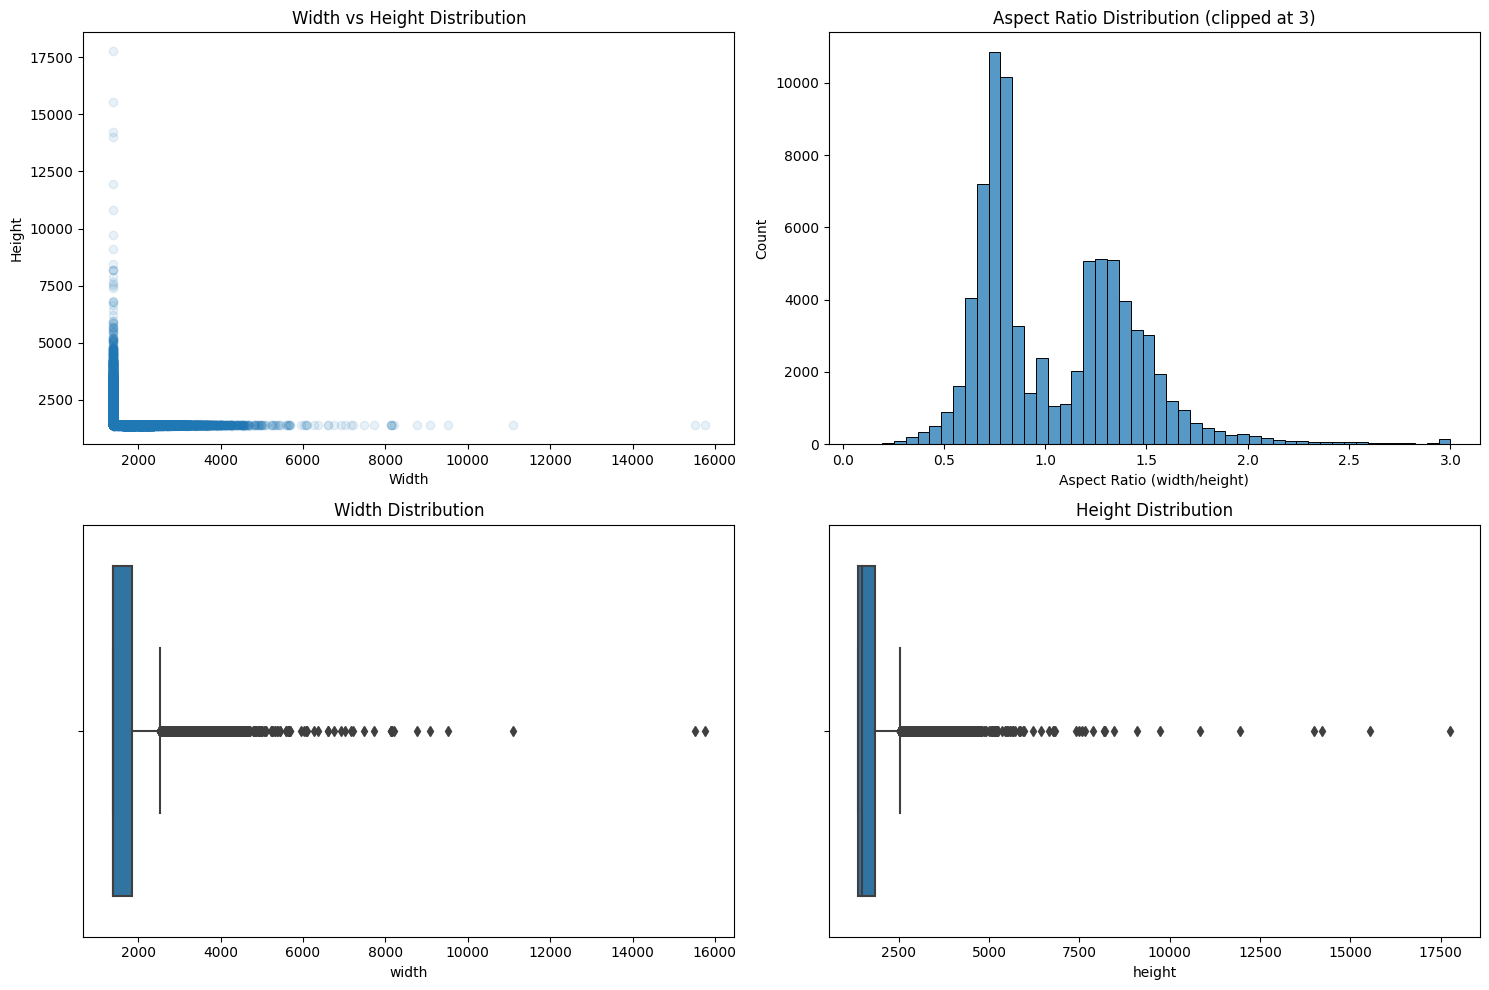


=== ANÁLISIS DE DIMENSIONES DE IMÁGENES ===

1. Estadísticas de Ancho (píxeles):
count    80042.000000
mean      1645.771058
std        400.528095
min       1381.000000
25%       1382.000000
50%       1382.000000
75%       1842.000000
max      15754.000000
Name: width, dtype: float64

2. Estadísticas de Alto (píxeles):
count    80042.000000
mean      1659.764848
std        401.144797
min       1381.000000
25%       1382.000000
50%       1492.000000
75%       1842.000000
max      17768.000000
Name: height, dtype: float64

3. Estadísticas de Área (píxeles cuadrados):
count    8.004200e+04
mean     2.658311e+06
std      5.777463e+05
min      1.909924e+06
25%      2.363220e+06
50%      2.545644e+06
75%      2.816516e+06
max      2.455538e+07
Name: area, dtype: float64

4. Dimensiones más comunes (width x height):
width  height
1842   1382      470
1382   1382      413
       1842      336
       1727      214
1727   1382      168
1382   2032      158
       1744      157
       1867      

{'width_stats': count    80042.000000
 mean      1645.771058
 std        400.528095
 min       1381.000000
 25%       1382.000000
 50%       1382.000000
 75%       1842.000000
 max      15754.000000
 Name: width, dtype: float64,
 'height_stats': count    80042.000000
 mean      1659.764848
 std        401.144797
 min       1381.000000
 25%       1382.000000
 50%       1492.000000
 75%       1842.000000
 max      17768.000000
 Name: height, dtype: float64,
 'aspect_ratios': 0        1.390738
 1        0.791523
 2        0.744211
 3        0.747431
 4        0.850462
            ...   
 80037    0.787016
 80038    0.840122
 80039    0.840122
 80040    0.978754
 80041    0.978754
 Length: 80042, dtype: float64,
 'area_stats': count    8.004200e+04
 mean     2.658311e+06
 std      5.777463e+05
 min      1.909924e+06
 25%      2.363220e+06
 50%      2.545644e+06
 75%      2.816516e+06
 max      2.455538e+07
 Name: area, dtype: float64,
 'common_dimensions': width  height
 1842   1382      4

In [40]:
analyze_image_dimensions(df_subset)

Guardar Dataframe

In [41]:
df_subset.to_csv('dataset.csv', index=False)